In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
def mse(y, y_pred):
    n = len(y)
    err = np.sum((y - y_pred)**2) / n
    return err

In [3]:
X = np.array([12, 15, 20, 3, 5, 50, 64, 4, 8, 72])

In [4]:
y = np.array([100, 130, 140, 70, 75, 170, 165, 50, 75, 200])

In [5]:
n = X.shape[0]
n

10

In [6]:
a = 20

In [7]:
b = 3

In [8]:
y_pred = a + b * X

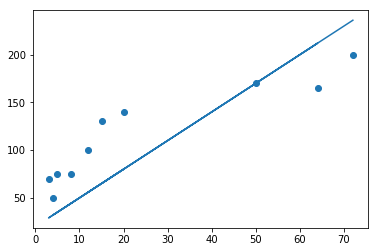

In [9]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [10]:
mse(y, y_pred)

1783.2

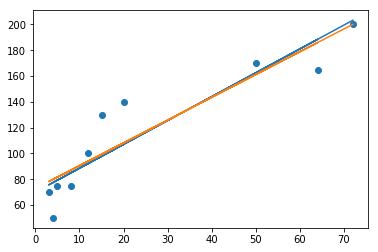

In [11]:
a = 70
b = 1.85
y_pred = a + X*b
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.plot(X, 72.78532760575524 + X*1.767378355503745)

In [12]:
mse_ = np.sum((y_pred - y)**2) / n
mse_

369.96175000000005

In [14]:
X

array([12, 15, 20,  3,  5, 50, 64,  4,  8, 72])

In [13]:
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

1.767378355503745

In [23]:
a = np.mean(y) - b * np.mean(X)
a

72.78532760575524

In [ ]:
72.78532760575524, 1.767378355503745

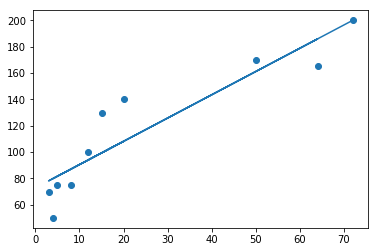

In [24]:
a = 72.78532760575524
b = 1.767378355503745
y_pred = a + X*b
plt.scatter(X, y)
plt.plot(X, y_pred)

In [25]:
mse_ = np.sum((y_pred - y)**2) / n
mse_

365.2040050462306

2 способ

$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

In [26]:
np.ones((1, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [28]:
X = X.reshape((1, 10))
X = np.vstack((np.ones((1, 10)), X))
X

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [12., 15., 20.,  3.,  5., 50., 64.,  4.,  8., 72.]])

In [30]:
y = y.reshape((1, 10))
y

array([[100, 130, 140,  70,  75, 170, 165,  50,  75, 200]])

In [31]:
X

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [12., 15., 20.,  3.,  5., 50., 64.,  4.,  8., 72.]])

In [32]:
X.T

array([[ 1., 12.],
       [ 1., 15.],
       [ 1., 20.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1., 50.],
       [ 1., 64.],
       [ 1.,  4.],
       [ 1.,  8.],
       [ 1., 72.]])

In [33]:
y

array([[100, 130, 140,  70,  75, 170, 165,  50,  75, 200]])

In [35]:
W = np.dot(np.linalg.inv(np.dot(X, X.T)), X) @ y.T
W

array([[72.78532761],
       [ 1.76737836]])

Способ 2а

$W = (X \cdot X^T)^{-1} \cdot X \cdot y^T$

$W = (X^T \cdot X)^{-1} \cdot X^T \cdot y$

In [ ]:
X 10x2

In [ ]:
X.T 2x10

In [ ]:
2x10 * 10x2 = 2x2

In [ ]:
2x2 2x10

In [ ]:
2x10  10x1

In [61]:
X = X.T
X

array([[ 1., 12.],
       [ 1., 15.],
       [ 1., 20.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1., 50.],
       [ 1., 64.],
       [ 1.,  4.],
       [ 1.,  8.],
       [ 1., 72.]])

In [62]:
y = y.T

In [63]:
y

array([[100],
       [130],
       [140],
       [ 70],
       [ 75],
       [170],
       [165],
       [ 50],
       [ 75],
       [200]])

In [64]:
W = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T) @ y
W

array([[72.78532761],
       [ 1.76737836]])

In [57]:
w0 = W[0, 0]
w0

72.78532760575524

In [58]:
w1 = W[1, 0]
w1

1.767378355503745

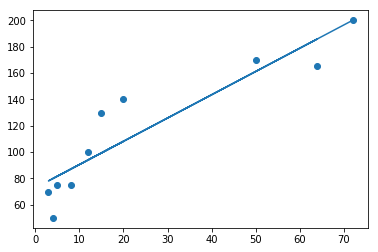

In [60]:
a = w0
b = w1
y_pred = a + X[1]*b
plt.scatter(X[1], y[0])
plt.plot(X[1], y_pred)

In [61]:
mse_ = np.sum((y_pred - y)**2) / n
mse_

365.2040050462306

3 способ

In [46]:
X = X.T
X

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [12., 15., 20.,  3.,  5., 50., 64.,  4.,  8., 72.]])

In [48]:
y = y.T
y

array([[100, 130, 140,  70,  75, 170, 165,  50,  75, 200]])

In [49]:
def mse_(w1, y=y[0], X=X[1], n=10):
    return np.sum((w1*X - y)**2)/n

In [50]:
mse_(3.2)

2985.612

In [54]:
f = 1/n * np.sum((w1*X - y)**2)

In [ ]:
f_p = (1/n) * np.sum(2 * (w1*X - y) * X) 

In [52]:
alpha = 1e-7

In [53]:
w1 = 0.1
w1

0.1

In [57]:
for i in range(10000):
    y_pred = w1*X[1]
    w1 -= alpha * (2/n) * np.sum((y_pred - y) * X[1])
    if i%1000 == 0:
        print('Iteration: {i}, w1 = {w1}, mse={mse}'.format(i=i, w1=w1, mse=mse_(w1)))

Iteration: 0, w1 = 0.10079057400000001, mse=15318.01371895192
Iteration: 1000, w1 = 0.799097237825186, mse=10416.269600205756
Iteration: 2000, w1 = 1.3411515899054722, mse=7462.72226951355
Iteration: 3000, w1 = 1.7619164713397617, mse=5683.061474639079
Iteration: 4000, w1 = 2.0885314773238637, mse=4610.72635005824
Iteration: 5000, w1 = 2.3420634778329354, mse=3964.5905118571536
Iteration: 6000, w1 = 2.5388654437697302, mse=3575.2611764304174
Iteration: 7000, w1 = 2.691631223706067, mse=3340.6706732231733
Iteration: 8000, w1 = 2.8102143049698705, mse=3199.3180979421163
Iteration: 9000, w1 = 2.9022633696745124, mse=3114.1460629900803


In [61]:
def mse2(y, y_pred):
    n = y.shape[1]
    err = np.sum((y - y_pred)**2) / n
    return err

In [62]:
W = np.array([[0.1, 0.1]])

alpha = 5*1e-5

for i in range(200001):
    y_pred = np.dot(W, X)
    W[0, 0] -= alpha * (2/n) * np.sum((y_pred - y)) 
    W[0, 1] -= alpha * (2/n) * np.sum((y_pred - y) * X[1]) 
    if i%20000 == 0:
        print('Iteration: {i}, w0 = {w0}, w1 = {w1}, mse={mse}'.format(i=i, w0=W[0, 0],
                                                            w1=W[0, 1], mse=mse2(y, y_pred)))

Iteration: 0, w0 = 0.111487, w1 = 0.4950340000000001, mse=15301.278999999999
Iteration: 20000, w0 = 45.76570072775706, w1 = 2.3074269363642146, mse=726.268755379943
Iteration: 40000, w0 = 62.732087762707934, w1 = 1.968315175793762, mse=415.18886553650447
Iteration: 60000, w0 = 69.04480106931624, w1 = 1.8421412697658854, mse=372.12377851047165
Iteration: 80000, w0 = 71.39358335333138, w1 = 1.7951955238101753, mse=366.1619604016466
Iteration: 100000, w0 = 72.26749888691405, w1 = 1.7777283379813602, mse=365.3366218822749
Iteration: 120000, w0 = 72.59265816840009, w1 = 1.771229291591377, mse=365.22236417445384
Iteration: 140000, w0 = 72.71364075112527, w1 = 1.7688111800310442, mse=365.20654663596525
Iteration: 160000, w0 = 72.75865495233786, w1 = 1.7679114690323248, mse=365.2043568972717
Iteration: 180000, w0 = 72.77540346493447, w1 = 1.7675767119870054, mse=365.20405375556913
Iteration: 200000, w0 = 72.78163511331864, w1 = 1.7674521583474796, mse=365.20401178942416
